In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import firwin, lfilter
from tqdm import tqdm
import pandas as pd
import sys
print(sys.executable)

c:\Users\franc\Franco\2025-2\INTRO A SEÑALES BIOMEDICAS\PROYECTO\GRUPO-08-ISB-2025-II\env\Scripts\python.exe


In [10]:
df = pd.read_csv("b_a_butterworth_orden4.csv", header=None, names=["b", "a"])
b = df["b"].dropna().values
a = df["a"].dropna().values
df.head()

,b,a
0,0.167179,1.000000e+00
1,0.000000,-1.110223e-15
2,-0.668717,-7.820952e-01
3,0.000000,6.106227e-16
4,1.003076,6.799785e-01


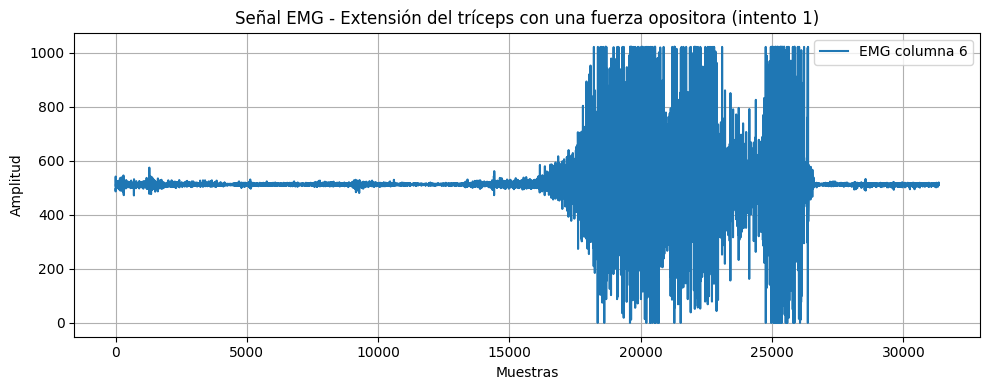

In [11]:
# Cargar todo el archivo
data = np.loadtxt("EMG-T_01_MOV2.txt")

# Extraer solo la columna 6 (índice 5)
emg_signal = data[:, 5]

# Graficar la señal
plt.figure(figsize=(10,4))
plt.plot(emg_signal, label="EMG columna 6")
plt.title("Señal EMG - Extensión del tríceps con una fuerza opositora (intento 1)")
plt.xlabel("Muestras")
plt.ylabel("Amplitud")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

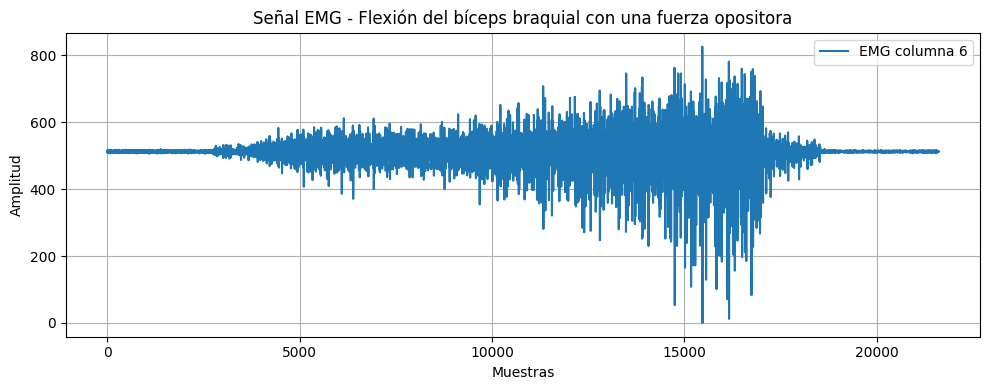

In [12]:
# Cargar todo el archivo 2
data = np.loadtxt("EMG_02_MOV2.txt")

# Extraer solo la columna 6 (índice 5)
emg_signal_2 = data[:, 5]

# Graficar la señal
plt.figure(figsize=(10,4))
plt.plot(emg_signal_2, label="EMG columna 6")
plt.title("Señal EMG - Flexión del bíceps braquial con una fuerza opositora")
plt.xlabel("Muestras")
plt.ylabel("Amplitud")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

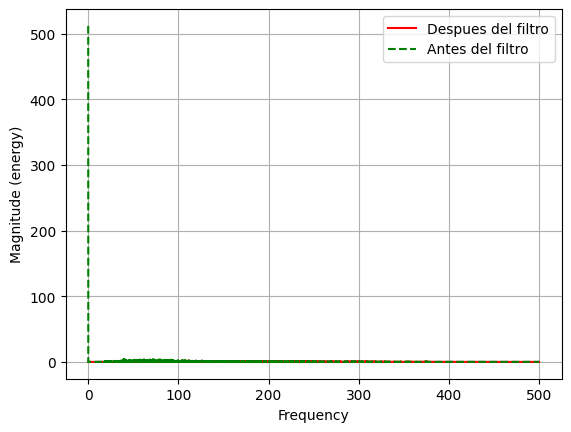

In [13]:
#Señales filtradas:
#señal 1:
y1= lfilter(b, a, emg_signal) 

plt.magnitude_spectrum(y1, Fs=1000, color="red", label="Despues del filtro")
plt.magnitude_spectrum(emg_signal, Fs=1000, color="green", ls="--", label="Antes del filtro")
plt.legend()
plt.grid("--")

plt.show()


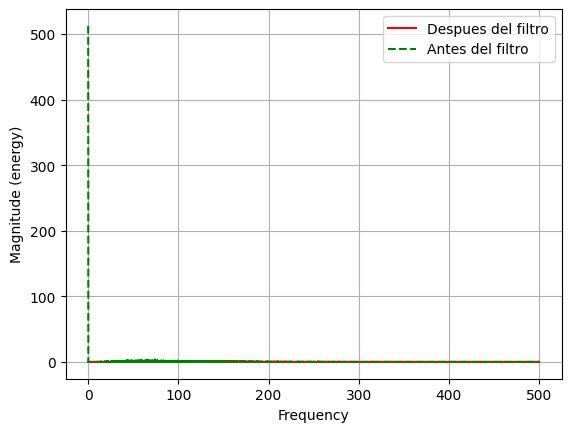

In [ ]:
#señal 2:
y2= lfilter(b, a, emg_signal_2) 

plt.magnitude_spectrum(y2, Fs=1000, color="red", label="Despues del filtro")
plt.magnitude_spectrum(emg_signal_2, Fs=1000, color="green", ls="--", label="Antes del filtro")
plt.legend()
plt.grid("--")

plt.show() 